# Machine Learning Challenge: Predict Titanic Survivors
More information on the [Kaggle site](https://www.kaggle.com/c/titanic/data)

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [2]:
# get titanic & test csv files as a DataFrame
training = pd.read_csv("../data/train.csv")

# 1. Exploratory Analysis

In [3]:
training.head() # print first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training.describe() # some interesting statistics for features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
training.keys() # Show features names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 1.1 Variable Description
- Survived: Survived (1) or died (0)
- Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


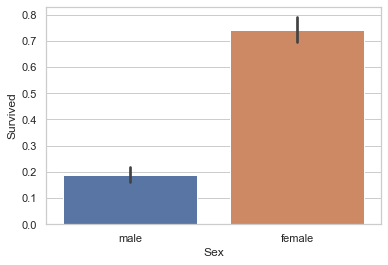

In [7]:
# Survived rate by sex
sns.barplot(x="Sex", y="Survived", data=training);

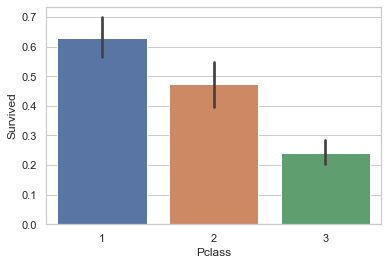

In [8]:
# Survived rate by Pclass
sns.barplot(x="Pclass", y="Survived", data=training)

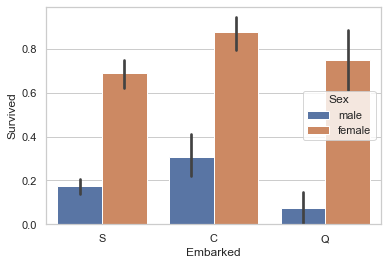

In [9]:
# Survived rate by Embarked
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=training);

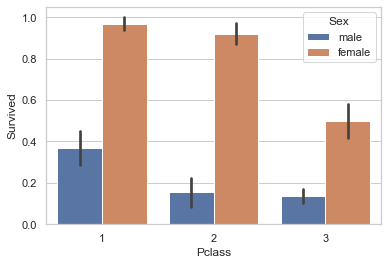

In [10]:
# Survived rate by Pclas and Sex
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training);

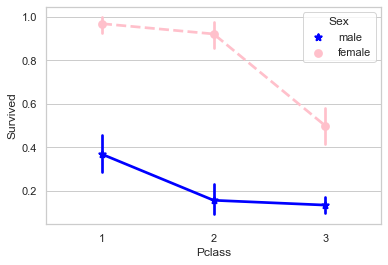

In [11]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=training,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

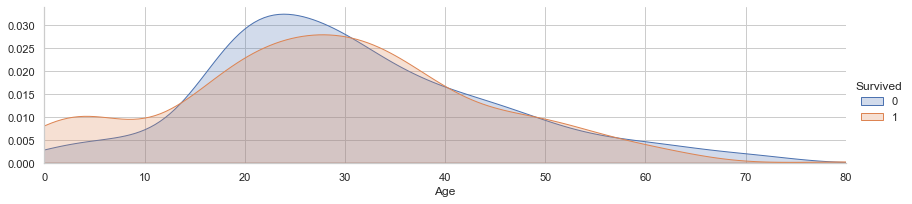

In [12]:
# peaks for survived/not survived passengers by their age

facet = sns.FacetGrid(training, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, training['Age'].max()))
facet.add_legend()

In [13]:
training = training.drop(['PassengerId','Name','Ticket'], axis=1)

In [14]:
training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## 1.2 NaN checking

In [15]:
training['Survived'].isnull().sum()

0

In [16]:
training['Pclass'].isnull().sum()

0

In [17]:
training['Sex'].isnull().sum()

0

In [18]:
training['Age'].isnull().sum()

177

In [19]:
training['SibSp'].isnull().sum()

0

In [20]:
training['Parch'].isnull().sum()

0

In [21]:
training['Fare'].isnull().sum()

0

In [22]:
training['Cabin'].isnull().sum()

687

In [23]:
training['Embarked'].isnull().sum()

2

# 2. Preprocessing

In [24]:
# Filling missing age values with median
training.Age = training.Age.fillna(training.Age.median())

In [25]:
# Age is now completed
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [26]:
Counter(training.Embarked.values)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [27]:
training.Embarked = training.Embarked.fillna('S')

In [28]:
# Embarked is now completed
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [29]:
Counter(training.Pclass.values)

Counter({3: 491, 1: 216, 2: 184})

In [30]:
embark_dummies_titanic  = pd.get_dummies(training['Embarked'])
sex_dummies_titanic  = pd.get_dummies(training['Sex'])
pclass_dummies_titanic  = pd.get_dummies(training['Pclass'], prefix="Class")

In [31]:
embark_dummies_titanic.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [32]:
sex_dummies_titanic.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [33]:
pclass_dummies_titanic.head()

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [34]:
training = training.drop(['Embarked', 'Sex', 'Pclass'], axis=1)
titanic = training.join([embark_dummies_titanic, sex_dummies_titanic, pclass_dummies_titanic])

In [35]:
titanic['FamilySize'] = titanic['Parch'] + titanic['SibSp']

In [36]:
titanic = titanic.drop(['Cabin','Parch','SibSp'], axis=1)

In [37]:
titanic.head()

,Survived,Age,Fare,C,Q,S,female,male,Class_1,Class_2,Class_3,FamilySize
0,0,22.0,7.2500,0,0,1,0,1,0,0,1,1
1,1,38.0,71.2833,1,0,0,1,0,1,0,0,1
2,1,26.0,7.9250,0,0,1,1,0,0,0,1,0
3,1,35.0,53.1000,0,0,1,1,0,1,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,0,0,1,0


## 2.2 Normalizing attributes

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
features = ['Age', 'Fare', 'FamilySize']
scaler = MinMaxScaler()
scaler.fit(titanic[features])
titanic[features] = scaler.transform(titanic[features])

In [40]:
titanic.head()

,Survived,Age,Fare,C,Q,S,female,male,Class_1,Class_2,Class_3,FamilySize
0,0,0.271174,0.014151,0,0,1,0,1,0,0,1,0.1
1,1,0.472229,0.139136,1,0,0,1,0,1,0,0,0.1
2,1,0.321438,0.015469,0,0,1,1,0,0,0,1,0.0
3,1,0.434531,0.103644,0,0,1,1,0,1,0,0,0.1
4,0,0.434531,0.015713,0,0,1,0,1,0,0,1,0.0


# 3. Training

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_all = titanic.drop(['Survived'], axis=1)
y_all = titanic.Survived

In [43]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [44]:
X_train.shape

(712, 11)

In [45]:
X_test.shape

(179, 11)

In [46]:
y_train.shape

(712,)

In [47]:
y_test.shape

(179,)

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_train, y_train)
pred_linsvc = linsvc_clf.predict(X_test)
acc_linsvc = accuracy_score(y_test, pred_linsvc)

print(acc_linsvc)

0.7653631284916201


In [50]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
pred_logistic = logistic_clf.predict(X_test)
acc_logistic = accuracy_score(y_test, pred_logistic)

print(acc_logistic)

0.770949720670391


In [51]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

print(acc_rf)

0.776536312849162


In [52]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
pred_ada = ada_clf.predict(X_test)
acc_ada = accuracy_score(y_test, pred_ada)

print(acc_ada)

0.7932960893854749


In [53]:
gradient_clf = GradientBoostingClassifier()
gradient_clf.fit(X_train, y_train)
pred_gradient = gradient_clf.predict(X_test)
acc_gradient = accuracy_score(y_test, pred_gradient)

print(acc_gradient)

0.8100558659217877


In [54]:
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)
pred_mlp = mlp_clf.predict(X_test)
acc_mlp = accuracy_score(y_test, pred_mlp)

print(acc_mlp)

0.776536312849162


Rose DeWiit Bukater
- Pclass: 1st Class
- Sex: Female
- Age: 17
- SibSp: 0
- Parch: 1
- Fare: 53.1000
- Embarked: 'S'

In [36]:
Rose_DeWiit_Bukater = [17, 0, 1, 53.1000, 0, 0, 1, 1, 0, 1, 0, 0 ]

Jack Dawson
- Pclass: 3rd Class
- Sex: Male
- Age: 23
- SibSp: 0
- Parch: 0
- Fare: 0
- Embarked: 'S'

In [37]:
Jack_Dawson = [23, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1 ]

In [38]:
linsvc_clf.predict([Rose_DeWiit_Bukater])

array([1])

In [39]:
linsvc_clf.predict([Jack_Dawson])

array([0])

In [40]:
rf_clf.predict([Rose_DeWiit_Bukater])

array([1])

In [41]:
rf_clf.predict([Jack_Dawson])

array([0])

In [59]:
model_performance = pd.DataFrame({
    "Model": ["Linear SVC", "Random Forest"],
    "Accuracy": [acc_linsvc, acc_rf, ]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
1,Random Forest,0.776536
0,Linear SVC,0.765363


In [60]:
import pickle

In [61]:
pickle.dump(linsvc_clf, open('../models/linsvc_clf.pkl', 'wb'))
pickle.dump(rf_clf, open('../models/rf_clf.pkl', 'wb'))
pickle.dump(gradient_clf, open('../models/gradient_clf.pkl', 'wb'))

In [45]:
linsvc = pickle.load(open( "../models/linsvc_clf.pkl", "rb" ))
rf = pickle.load(open( "../models/rf_clf.pkl", "rb" ))

In [46]:
linsvc.predict([Rose_DeWiit_Bukater, Jack_Dawson])

array([1, 0])

In [47]:
rf.predict([Rose_DeWiit_Bukater, Jack_Dawson])

array([1, 0])